# E-commerce Marketing and Shopping EDA & Hypothesis Testing 📊🔍📈

This project involves conducting a comprehensive exploratory data analysis (EDA) and hypothesis testing on two datasets: one containing information on customers visiting a shopping site for purchase and another with demographic, purchase, and marketing information about a group of people.

## Datasets 📂

- [Shopping Dataset](https://drive.google.com/drive/folders/11o4VGwvJKFOElwikEDiLCViWhy2E404R)
- [Data Dictionary](https://docs.google.com/document/d/1UX0GipJik6ubEv1GxCYtTdfs5L6z4sZxDpSSosK8JZM/edit?usp=sharing)

## Expectations 🎯

The project aims to analyze user behavior across different page categories, engagement time, and other features. It involves gaining insights into factors influencing purchase decisions and identifying areas for optimization. Additionally, hypotheses will be formulated and tested on the dataset.

## Suggestions for Analysis 🚀

### Shopping Dataset:

1. **Preprocessing:**
   - Clean and preprocess the data as required.

2. **Univariate Analysis:**
   - Plot histograms or box plots for each numerical feature to identify outliers and distribution shapes.

3. **Correlation Analysis:**
   - Calculate correlations between numerical features to identify potential relationships.

4. **Visualizations:**
   - Use scatter plots, pair plots, or heatmaps to visualize relationships between numerical features.

5. **Class Distribution:**
   - Check the distribution of the target variable ('Revenue') to understand class balance.

6. **Page Views and Durations:**
   - Summarize page views, durations, and bounce/exit rates for each page category.

7. **SpecialDay Distribution:**
   - Analyze SpecialDay distribution and its correlation with Revenue.

8. **Binary Feature Creation:**
   - Generate a binary feature indicating whether the user visited all three page categories.

9. **PageValues Distribution:**
   - Explore PageValues distribution and its relationship with TrafficType, VisitorType, and Region.

10. **User Session Lengths:**
    - Investigate user session lengths and their impact on conversion rates.

11. **User Segmentation:**
    - Group users based on VisitorType, OperatingSystems, and Region to identify potential differences in behavior and conversion rates.

12. **TrafficType Analysis:**
    - Segment users based on TrafficType and analyze their engagement patterns and purchase probability.

### Campaign Dataset:

1. **EDA on Various Features:**
   - Conduct exploratory data analysis on various features and columns.

2. **Feature Engineering:**
   - Perform feature engineering for the required analysis.

3. **Extreme Value Removal:**
   - Remove extreme values if required.

4. **Hypothesis Testing:**
   - Conduct hypothesis testing on specific scenarios.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

In [ ]:
dfs = pd.read_csv('shopping.csv')
dfc = pd.read_csv('campaign - campaign.csv')

In [ ]:
dfs.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [ ]:
dfc.head()

ID  Year_Birth   Education Marital_Status      Income  Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00        0   
1      1        1961  Graduation         Single  $57,091.00        0   
2  10476        1958  Graduation        Married  $67,267.00        0   
3   1386        1967  Graduation       Together  $32,474.00        1   
4   5371        1989  Graduation         Single  $21,474.00        1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
0         0     6/16/14        0       189  ...                    4   
1         0     6/15/14        0       464  ...                    3   
2         1     5/13/14        0       134  ...                    2   
3         1     5/11/14        0        10  ...                    0   
4         0      4/8/14        0         6  ...                    1   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  6                  1             0             0   
1                  7                  5             0             0   
2                  5                  2             0             0   
3                  2                  7             0             0   
4                  2                  7             1             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Country  
0             0             0             0         0       SP  
1             0             0             1         0       CA  
2             0             0             0         0       US  
3             0             0             0         0      AUS  
4             0             0             0         0       SP  

[5 rows x 27 columns]

In [ ]:
dfc['Dt_Customer'].describe()

count        2239
unique        663
top       8/31/12
freq           12
Name: Dt_Customer, dtype: object

In [ ]:
dfs.describe()


Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

Handling Missing values:

In [ ]:
dfs.isnull().sum()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
dfs = dfs.dropna()

In [ ]:
dfs.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
dfc.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Country'],
      dtype='object')

In [ ]:
dfs.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [ ]:
dfc.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Complain                int64
Country                object
dtype: object

In [ ]:
dfs['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [ ]:
dfs['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [ ]:
dfc['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [ ]:
dfc["Marital_Status"].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [ ]:
dfc["Country"].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

In [ ]:
# Assuming 'Month' is a nominal variable
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
dfs['Month'] = dfs['Month'].replace(month_mapping)

# Assuming 'VisitorType' is a nominal variable
visitor_type_mapping = {'New_Visitor': 1, 'Returning_Visitor': 2, 'Other': 3}
dfs['VisitorType'] = dfs['VisitorType'].replace(visitor_type_mapping)


In [ ]:
# Convert 'Weekend' column
dfs['Weekend'] = dfs['Weekend'].astype(int)

# Convert 'Revenue' column
dfs['Revenue'] = dfs['Revenue'].astype(int)


In [ ]:
dfs.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
Revenue                      int64
dtype: object

In [ ]:
# Assuming 'Income' column contains values like '$50,000'
dfc['Income'] = dfc['Income'].replace('[\$,]', '', regex=True)

# Convert 'Income' column
dfc['Income'] = dfc['Income'].astype(float)

# Convert 'date' column
# Assuming 'Dt_Customer' is the date column
dfc['Dt_Customer'] = pd.to_datetime(dfc['Dt_Customer'], format='%m/%d/%y')


In [ ]:
dfc.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Country     

In [ ]:
numerical_features_shopping = ['Administrative', 'Administrative_Duration', 'Informational',
                               'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                               'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

In [ ]:
numerical_features_campaign = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                               'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                               'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                               'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                               'NumWebVisitsMonth', 'Complain']

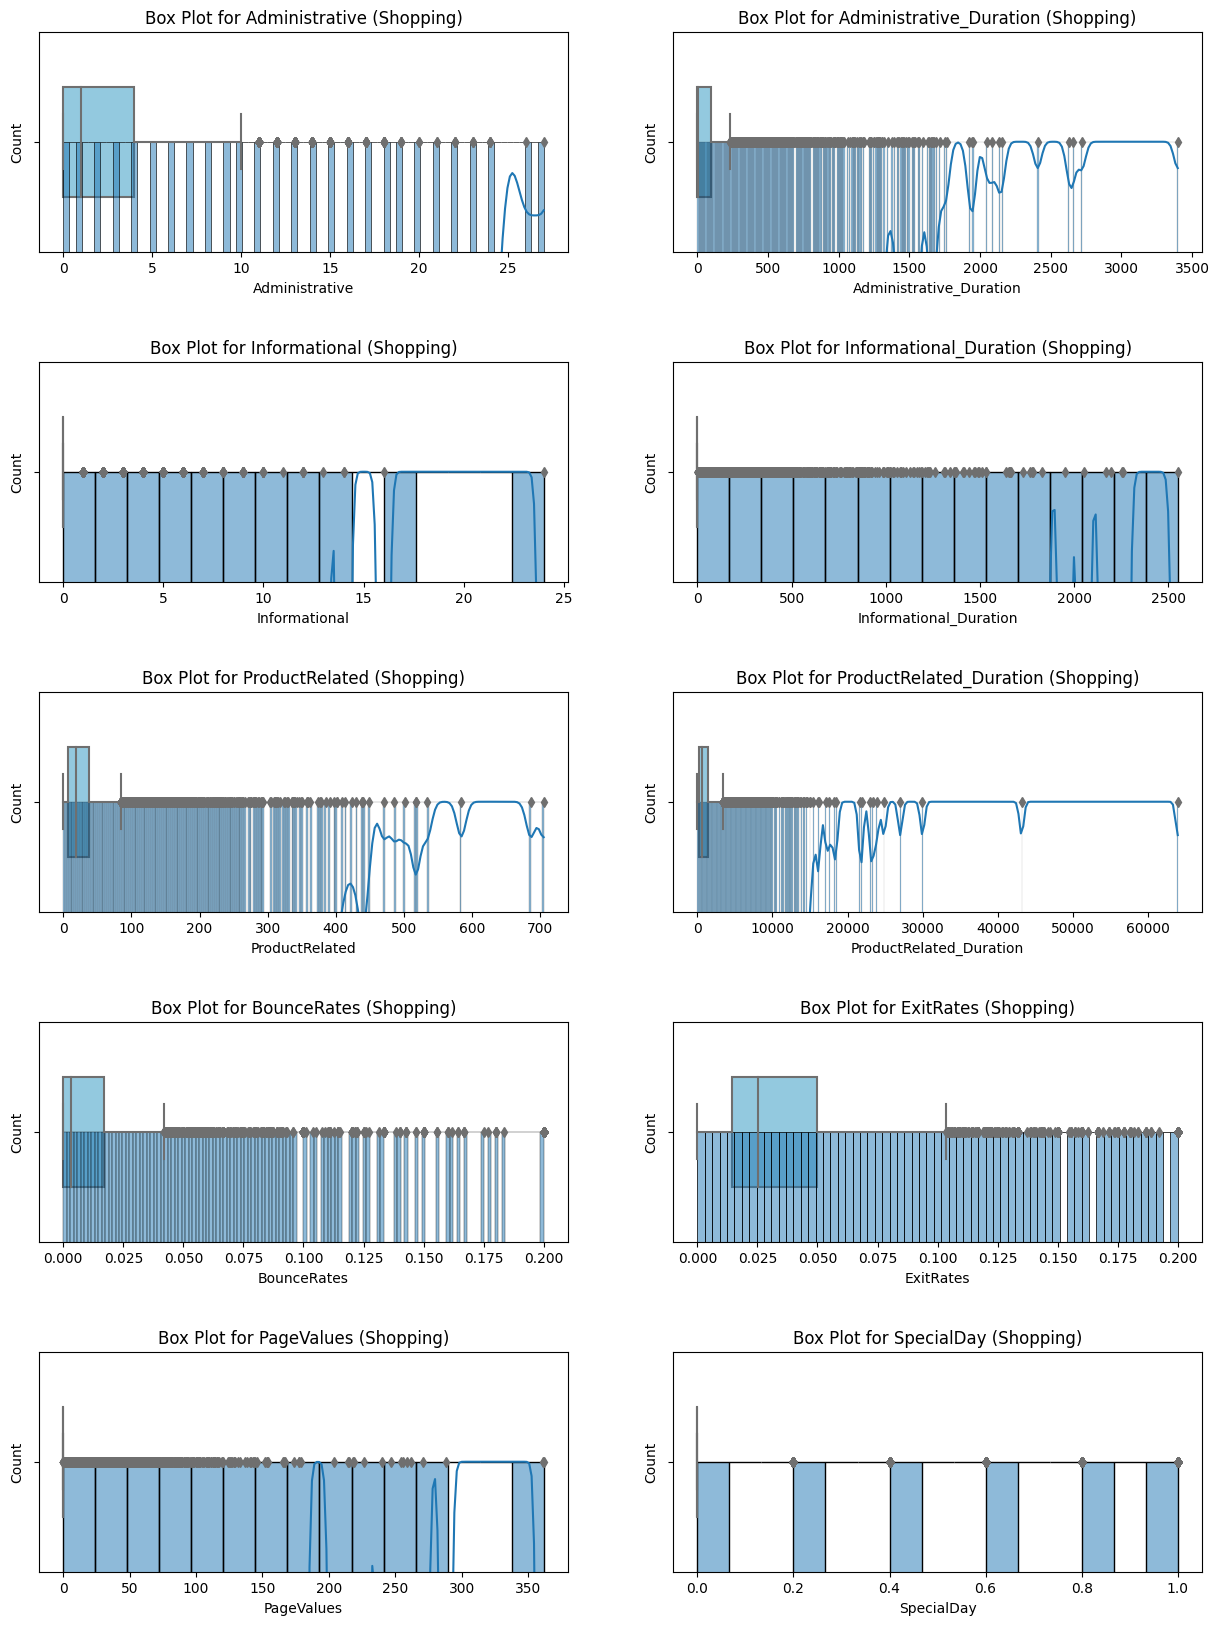

In [ ]:
# Univariate Analysis for the Shopping dataset
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(numerical_features_shopping):
    sns.histplot(dfs[feature], ax=axes[i // 2, i % 2], kde=True)
    axes[i // 2, i % 2].set_title(f'Histogram for {feature} (Shopping)')
    sns.boxplot(x=dfs[feature], ax=axes[i // 2, i % 2], width=0.5, color='skyblue')
    axes[i // 2, i % 2].set_title(f'Box Plot for {feature} (Shopping)')

plt.show()



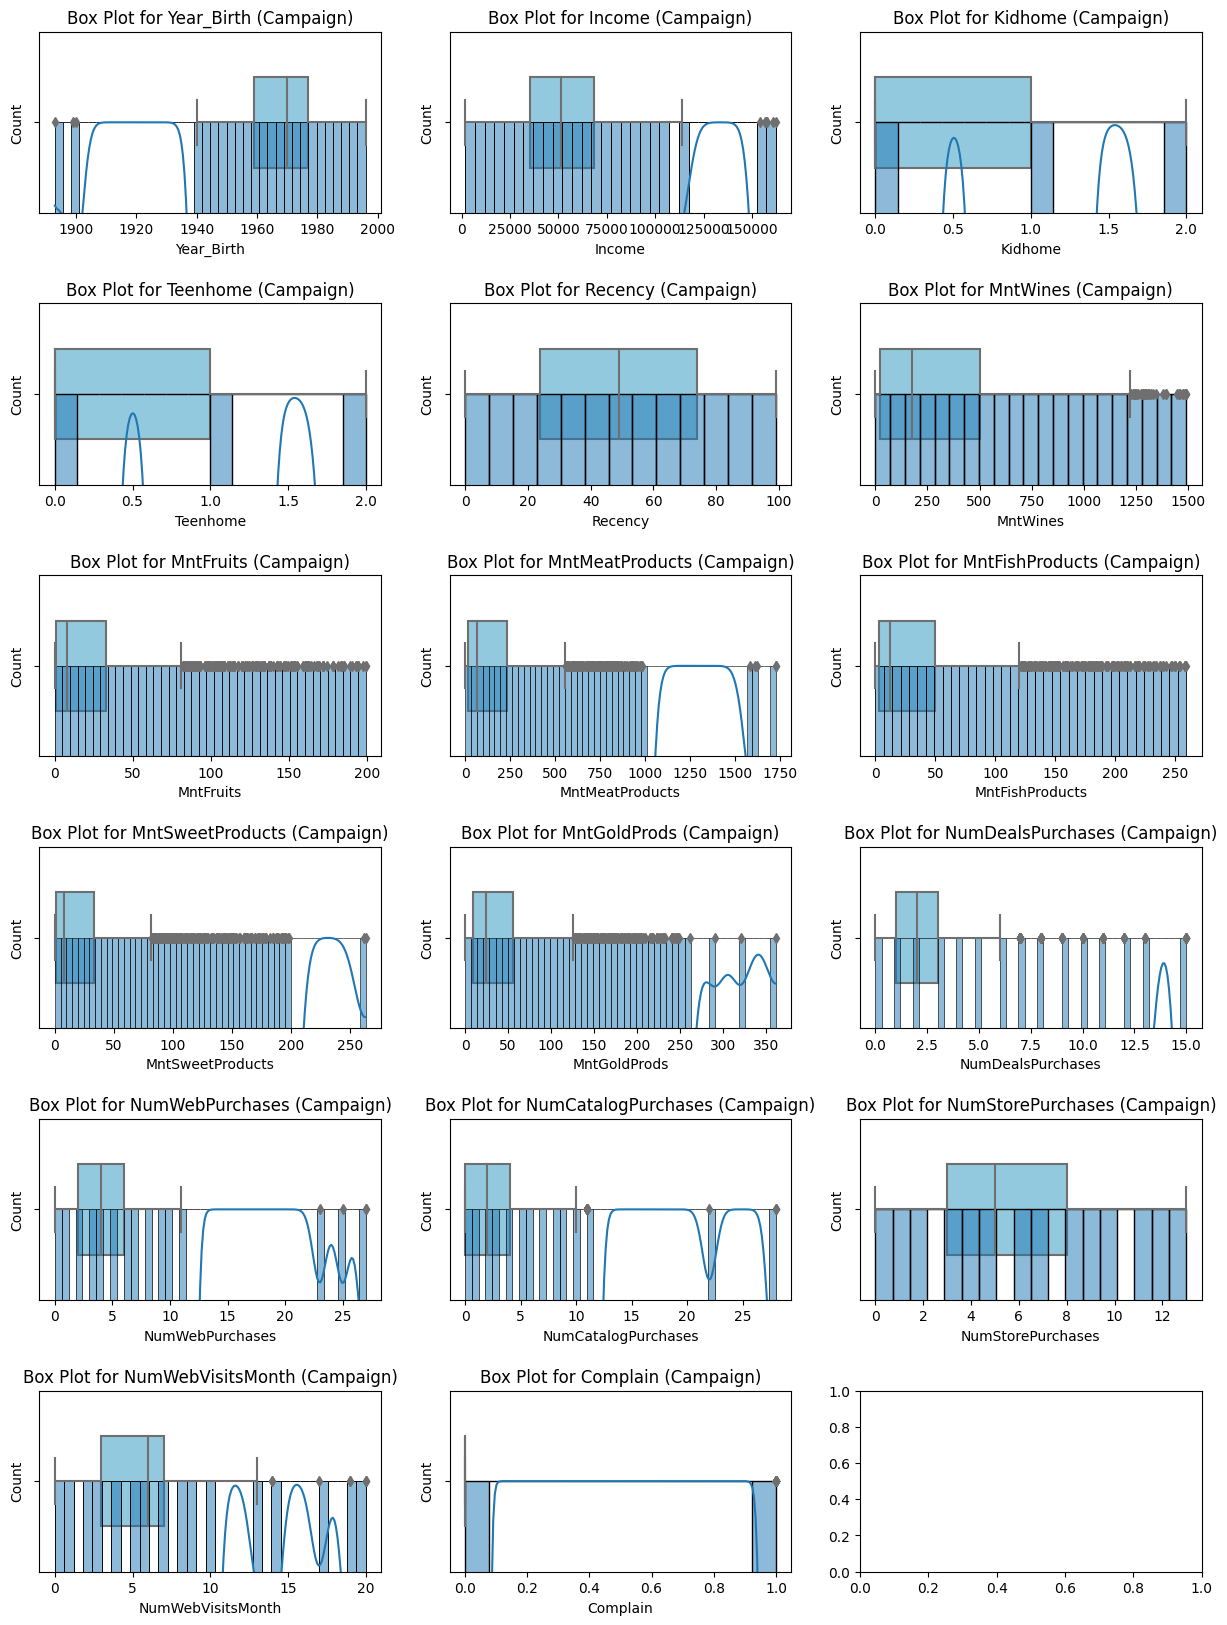

In [ ]:
# Univariate Analysis for the Campaign dataset

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(numerical_features_campaign):
    sns.histplot(dfc[feature], ax=axes[i // 3, i % 3], kde=True)
    axes[i // 3, i % 3].set_title(f'Histogram for {feature} (Campaign)')
    sns.boxplot(x=dfc[feature], ax=axes[i // 3, i % 3], width=0.5, color='skyblue')
    axes[i // 3, i % 3].set_title(f'Box Plot for {feature} (Campaign)')

plt.show()


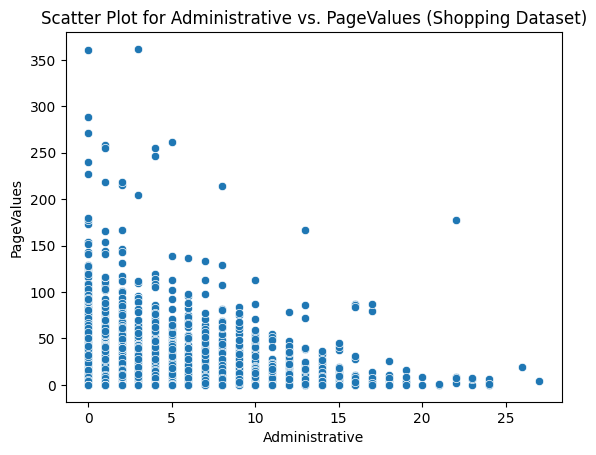

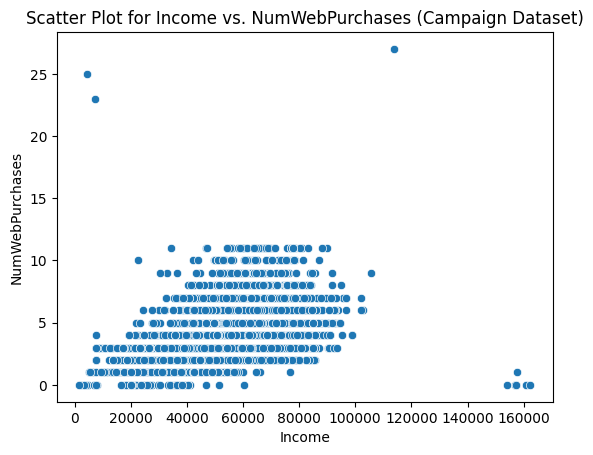

In [ ]:
# Scatter plot for the Shopping dataset
sns.scatterplot(x='Administrative', y='PageValues', data=dfs)
plt.title('Scatter Plot for Administrative vs. PageValues (Shopping Dataset)')
plt.show()

# Scatter plot for the Campaign dataset
sns.scatterplot(x='Income', y='NumWebPurchases', data=dfc)
plt.title('Scatter Plot for Income vs. NumWebPurchases (Campaign Dataset)')
plt.show()

In [ ]:
# Function to handle outliers using IQR method
def handle_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and handle outliers
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    data.loc[outliers, column] = np.nan  # Replace outliers with NaN or remove them

    return data

# Apply the function to the desired columns



In [ ]:
numerical_log_features_shopping = [ 'Informational','Informational_Duration',  'PageValues', 'SpecialDay']

In [ ]:
for column in numerical_log_features_shopping:
    dfs[f'{column}_log'] = np.log1p(dfs[column])

In [ ]:
numerical_outlier_features_shopping = ['Administrative', 'Administrative_Duration', 'ProductRelated', 'ProductRelated_Duration',
                               'BounceRates', 'ExitRates']

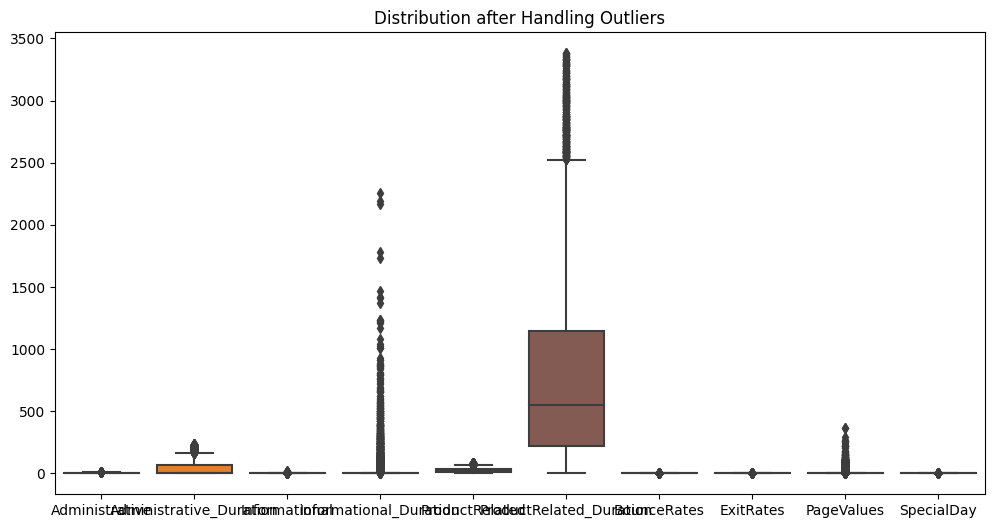

In [ ]:

for column in numerical_outlier_features_shopping:
    dfs = handle_outliers_iqr(dfs, column)

# Drop rows with outliers
dfs = dfs.dropna()

# Visualize the distribution after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=dfs[numerical_features_shopping])
plt.title('Distribution after Handling Outliers')
plt.show()

<ipython-input-183-d18a8fd778aa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfs.corr(),cmap='coolwarm',annot = True)


Text(0.5, 1.0, 'Correlation Shopping Dataset')

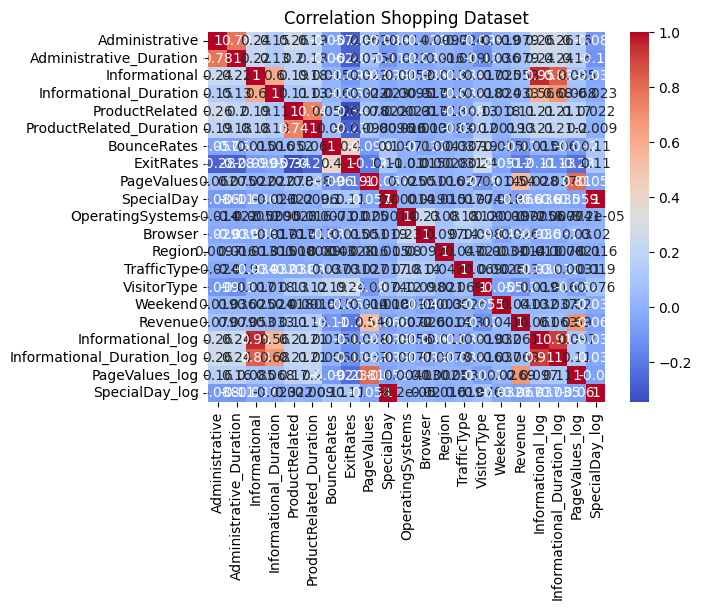

In [ ]:
sns.heatmap(dfs.corr(),cmap='coolwarm',annot = True)
plt.title('Correlation Shopping Dataset')

<ipython-input-184-0de910fd52ca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfc.corr(),cmap='coolwarm',annot = True)


Text(0.5, 1.0, 'Correlation Campaign Dataset')

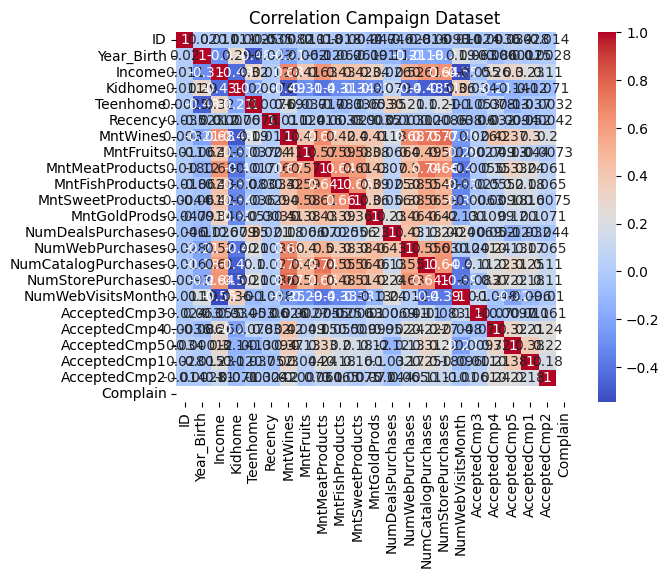

In [ ]:
sns.heatmap(dfc.corr(),cmap='coolwarm',annot = True)
plt.title('Correlation Campaign Dataset')

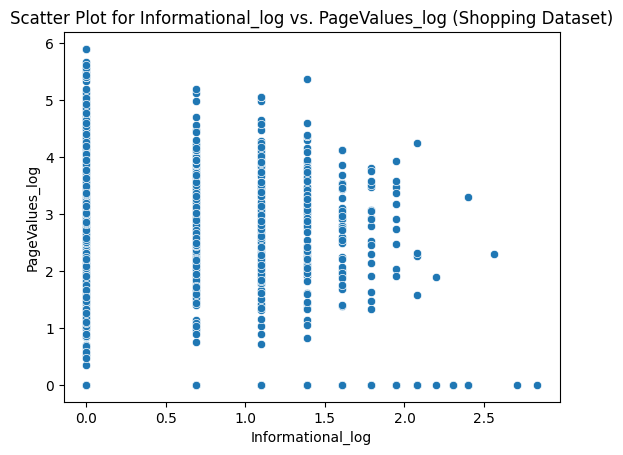

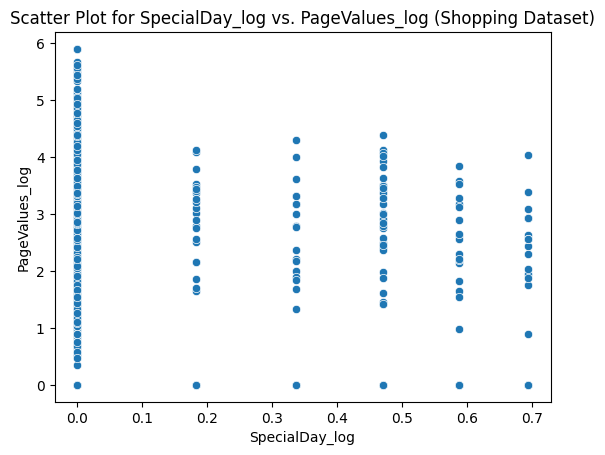

In [ ]:
sns.scatterplot(x='Informational_log', y='PageValues_log', data=dfs)
plt.title('Scatter Plot for Informational_log vs. PageValues_log (Shopping Dataset)')
plt.show()

sns.scatterplot(x='SpecialDay_log', y='PageValues_log', data=dfs)
plt.title('Scatter Plot for SpecialDay_log vs. PageValues_log (Shopping Dataset)')
plt.show()

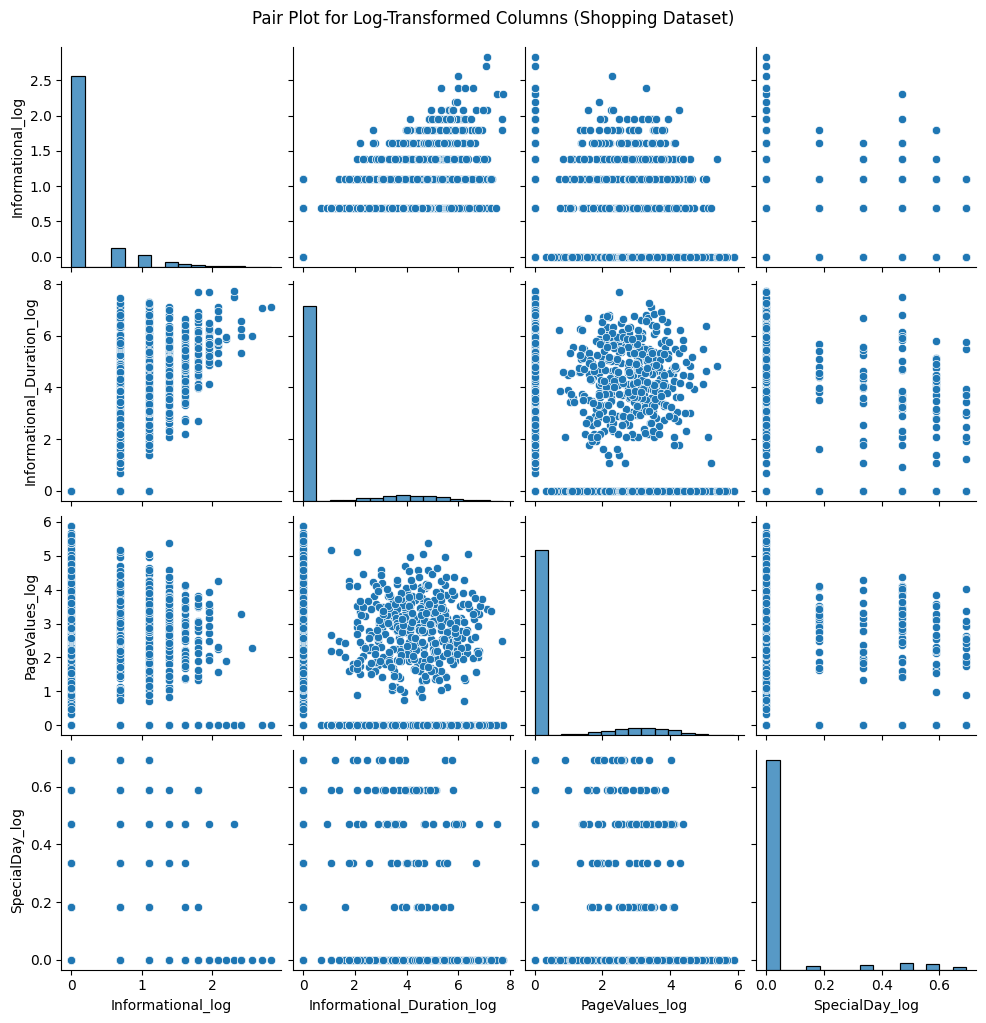

In [ ]:
log_transformed_columns = ['Informational_log', 'Informational_Duration_log', 'PageValues_log', 'SpecialDay_log']
sns.pairplot(dfs[log_transformed_columns])
plt.suptitle('Pair Plot for Log-Transformed Columns (Shopping Dataset)', y=1.02)
plt.show()

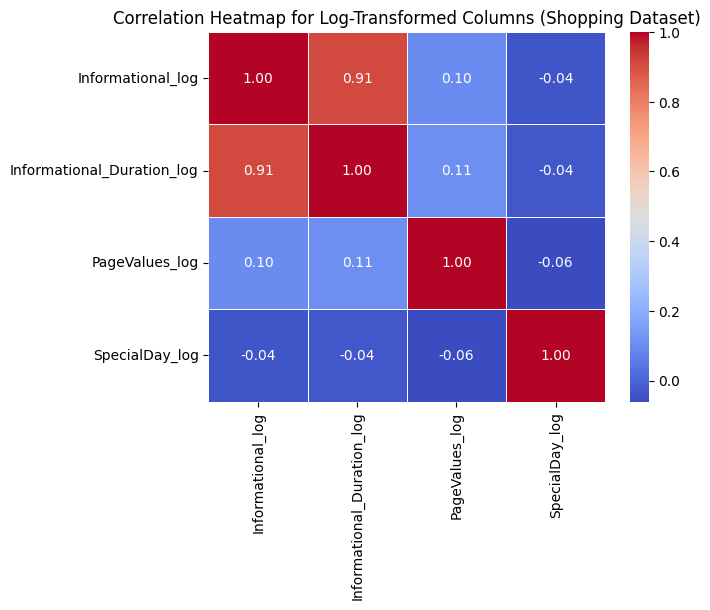

In [ ]:
# Correlation heatmap for the Shopping dataset (log-transformed columns)
correlation_log_transformed = dfs[log_transformed_columns].corr()
sns.heatmap(correlation_log_transformed, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Log-Transformed Columns (Shopping Dataset)')
plt.show()


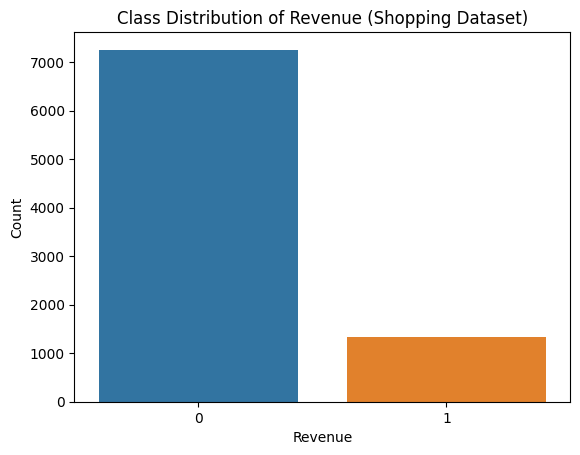

In [ ]:
sns.countplot(x='Revenue', data=dfs)
plt.title('Class Distribution of Revenue (Shopping Dataset)')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

In [ ]:
class_distribution = dfs['Revenue'].value_counts(normalize=True) * 100
print("Class Distribution (%):")
print(class_distribution)

Class Distribution (%):
0    84.448842
1    15.551158
Name: Revenue, dtype: float64


In [ ]:
# Group by 'Month' and compute mean and sum of page views for each category
page_views_summary = dfs.groupby(['Month', 'VisitorType']).agg({
    'Administrative': ['mean', 'sum'],
    'Informational': ['mean', 'sum'],
    'ProductRelated': ['mean', 'sum']
}).reset_index()

# Rename columns for clarity
page_views_summary.columns = ['Month', 'VisitorType',
                              'Avg_Administrative', 'Total_Administrative',
                              'Avg_Informational', 'Total_Informational',
                              'Avg_ProductRelated', 'Total_ProductRelated']

# Display the summary
print("Page Views Summary:")
print(page_views_summary)


Page Views Summary:
   Month  VisitorType  Avg_Administrative  Total_Administrative  \
0      2            1            0.000000                   0.0   
1      2            2            0.495935                  61.0   
2      3            1            2.592784                 503.0   
3      3            2            1.444531                1862.0   
4      5            1            2.258065                 630.0   
5      5            2            1.494409                3074.0   
6      7            1            2.959184                 145.0   
7      7            2            1.815126                 432.0   
8      8            1            2.890909                 159.0   
9      8            2            2.101322                 477.0   
10     9            1            2.811881                 284.0   
11     9            2            2.366972                 516.0   
12    10            1            2.603774                 276.0   
13    10            2            2.554745 

1. Administrative Page Category:

The average and total administrative page views are presented for each month and visitor type.
For example, in June, New Visitors (VisitorType=1) had an average of 2.87 administrative page views, totaling 66 page views.
2. Informational Page Category:

Similar to the administrative category, average and total informational page views are provided.
For instance, in November, Returning Visitors (VisitorType=2) had an average of 0.41 informational page views, totaling 640 page views.
3. Product-Related Page Category:

The analysis includes both average and total product-related page views for each group.
In September, New Visitors had an average of 15.19 product-related page views, totaling 1534 page views.
4. General Trends:

Overall, it appears that the Product-Related page category has higher average and total page views compared to Administrative and Informational categories.
There are variations in page views across months and visitor types.

In [ ]:
# Group by 'Month' and compute mean and sum of durations for each category
durations_summary = dfs.groupby(['Month', 'VisitorType']).agg({
    'Administrative_Duration': ['mean', 'sum'],
    'Informational_Duration': ['mean', 'sum'],
    'ProductRelated_Duration': ['mean', 'sum']
}).reset_index()

# Rename columns for clarity
durations_summary.columns = ['Month', 'VisitorType',
                              'Avg_Administrative_Duration', 'Total_Administrative_Duration',
                              'Avg_Informational_Duration', 'Total_Informational_Duration',
                              'Avg_ProductRelated_Duration', 'Total_ProductRelated_Duration']

# Display the summary
print("Durations Summary:")
print(durations_summary)


Durations Summary:
   Month  VisitorType  Avg_Administrative_Duration  \
0      2            1                     0.000000   
1      2            2                     7.903997   
2      3            1                    70.864407   
3      3            2                    32.877098   
4      5            1                    58.901125   
5      5            2                    33.612811   
6      7            1                    72.381701   
7      7            2                    35.557050   
8      8            1                    66.119879   
9      8            2                    50.257995   
10     9            1                    61.519029   
11     9            2                    54.646871   
12    10            1                    68.626478   
13    10            2                    61.619728   
14    11            1                    45.294550   
15    11            2                    36.340171   
16    11            3                    10.730769   
17    12 

1. Administrative Page Category Durations:

For example, in February (Month=2), Returning Visitors (VisitorType=2) had an average administrative duration of approximately 7.90 seconds, totaling 972.19 seconds.
2. Informational Page Category Durations:

In March, New Visitors (VisitorType=1) had an average informational duration of around 30.87 seconds, totaling 5988.42 seconds.
3. Product-Related Page Category Durations:

In June, New Visitors had an average product-related duration of approximately 505.63 seconds, totaling 11629.46 seconds.
4. General Trends:

The average and total durations vary across months and visitor types.
Product-Related page categories generally have higher average and total durations compared to Administrative and Informational categories.

In [ ]:
# Group by 'Month' and compute mean of bounce and exit rates for each category
bounce_exit_rates_summary = dfs.groupby(['Month', 'VisitorType']).agg({
    'BounceRates': 'mean',
    'ExitRates': 'mean'
}).reset_index()

# Rename columns for clarity
bounce_exit_rates_summary.columns = ['Month', 'VisitorType', 'Avg_BounceRates', 'Avg_ExitRates']

# Display the summary
print("Bounce/Exit Rates Summary:")
print(bounce_exit_rates_summary)


Bounce/Exit Rates Summary:
    Month  VisitorType  Avg_BounceRates  Avg_ExitRates
0       2            1         0.000000       0.015385
1       2            2         0.004817       0.037732
2       3            1         0.000756       0.014403
3       3            2         0.005547       0.031757
4       5            1         0.001669       0.016649
5       5            2         0.008047       0.033349
6       6            1         0.002490       0.011468
7       6            2         0.009983       0.039154
8       7            1         0.002545       0.017299
9       7            2         0.010242       0.033310
10      8            1         0.001151       0.014566
11      8            2         0.007506       0.029211
12      9            1         0.000691       0.014959
13      9            2         0.006973       0.028298
14     10            1         0.001291       0.017009
15     10            2         0.007881       0.027495
16     11            1         0.00222

1. Bounce Rates:

Bounce rate represents the percentage of visitors who enter the site and then leave without interacting further. It's calculated as the percentage of single-page visits.
2. Exit Rates:

Exit rate represents the percentage of pageviews that were the last in a session. It indicates where users leave the site.
3. Interpretation:

For example, in February (Month=2), New Visitors (VisitorType=1) had an average bounce rate of 0.00% and an exit rate of 1.54%.
In June, Returning Visitors (VisitorType=2) had an average bounce rate of 0.83% and an exit rate of 3.92%.
4. General Trends:

Bounce rates and exit rates vary across months and visitor types.
Different visitor types may exhibit distinct patterns in bounce and exit rates.
The data provides insights into user engagement and potential areas for improvement in terms of reducing bounce rates and optimizing exit points.

<Axes: xlabel='SpecialDay', ylabel='Count'>

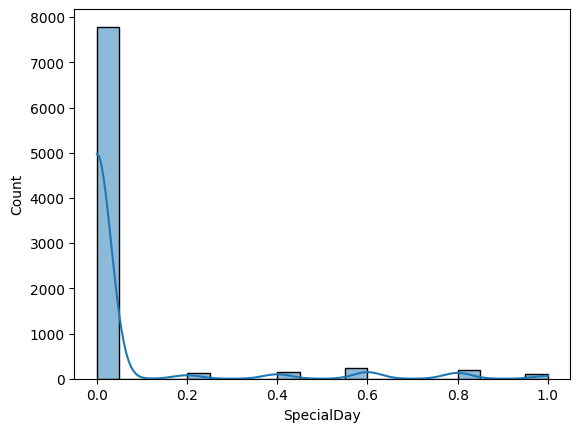

In [ ]:
sns.histplot(dfs['SpecialDay'], bins=20, kde=True)

<Axes: >

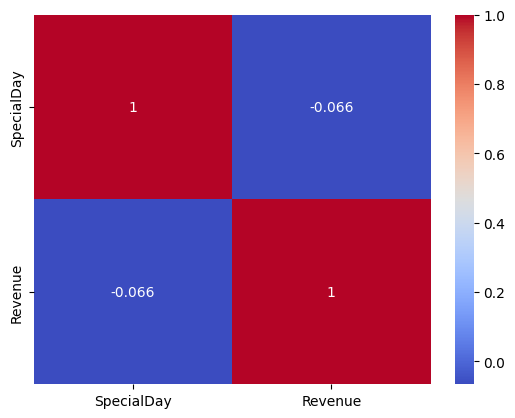

In [ ]:
sns.heatmap(dfs[['SpecialDay', 'Revenue']].corr(), annot=True, cmap='coolwarm')

there is a slight tendency for revenue to be lower on special days, but the relationship is not strong.

Text(0, 0.5, 'Average Revenue')

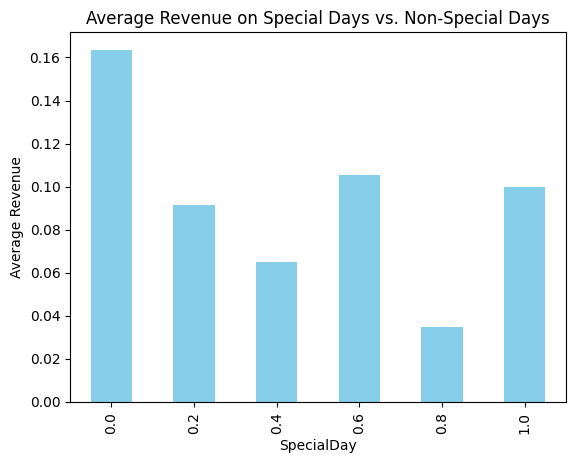

In [ ]:
average_revenue_specialday = dfs.groupby('SpecialDay')['Revenue'].mean()
average_revenue_specialday.plot(kind='bar', color='skyblue')
plt.title('Average Revenue on Special Days vs. Non-Special Days')
plt.xlabel('SpecialDay')
plt.ylabel('Average Revenue')

In [ ]:
# Assuming 'df_shopping' is your DataFrame for the Shopping dataset

# Create a new binary feature 'VisitedAllCategories'
dfs['VisitedAllCategories'] = (dfs['Administrative'] > 0) & \
                                      (dfs['Informational'] > 0) & \
                                      (dfs['ProductRelated'] > 0)

# Convert boolean values to 1s and 0s
dfs['VisitedAllCategories'] = dfs['VisitedAllCategories'].astype(int)

# Display the updated DataFrame
print(dfs[['Administrative', 'Informational', 'ProductRelated', 'VisitedAllCategories']])


       Administrative  Informational  ProductRelated  VisitedAllCategories
1                 0.0              0             2.0                     0
4                 0.0              0            10.0                     0
5                 0.0              0            19.0                     0
8                 0.0              0             2.0                     0
9                 0.0              0             3.0                     0
...               ...            ...             ...                   ...
12324             0.0              1            16.0                     0
12325             3.0              0            53.0                     0
12326             0.0              0             5.0                     0
12328             4.0              0            15.0                     0
12329             0.0              0             3.0                     0

[8591 rows x 4 columns]


In [ ]:
dfs['VisitedAllCategories'].value_counts()

0    7465
1    1126
Name: VisitedAllCategories, dtype: int64

1. There are 7,465 instances where the user did not visit all three page categories.
2. There are 1,126 instances where the user visited all three page categories.

Distribution of PageValues:

Text(0, 0.5, 'Frequency')

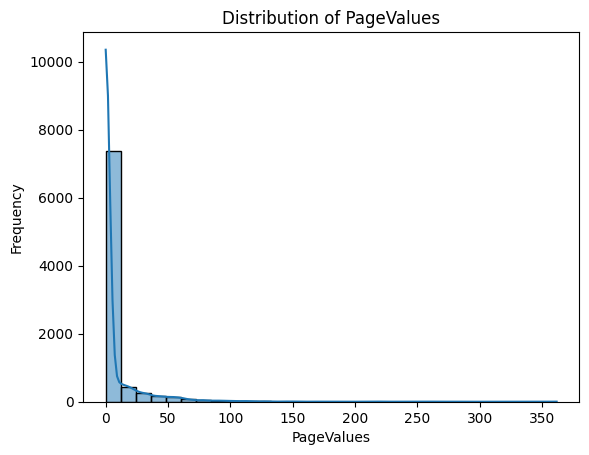

In [ ]:
sns.histplot(dfs['PageValues'], bins=30, kde=True)
plt.title('Distribution of PageValues')
plt.xlabel('PageValues')
plt.ylabel('Frequency')

Relationship with TrafficType:

Text(0, 0.5, 'PageValues')

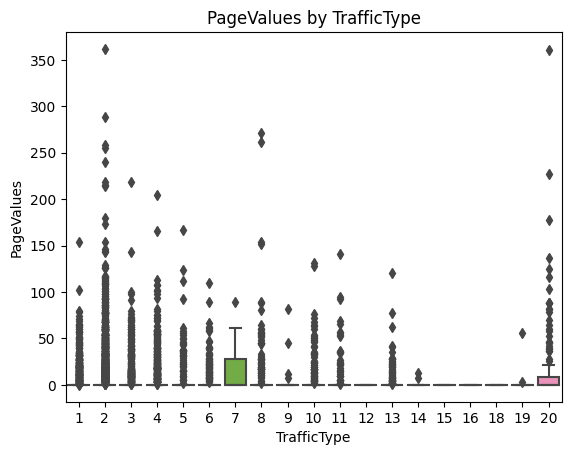

In [ ]:
sns.boxplot(x='TrafficType', y='PageValues', data=dfs)
plt.title('PageValues by TrafficType')
plt.xlabel('TrafficType')
plt.ylabel('PageValues')

Relationship with VisitorType:

Text(0, 0.5, 'PageValues')

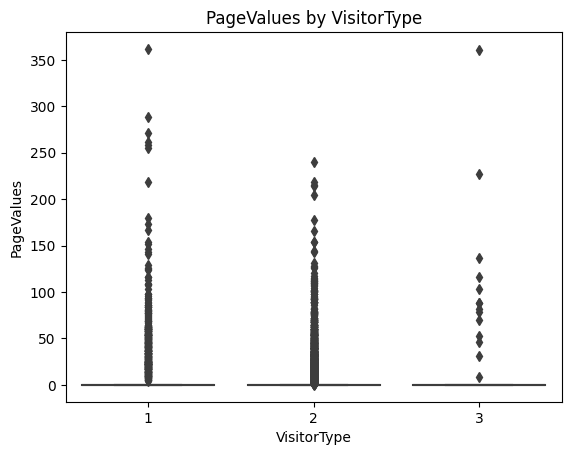

In [ ]:
sns.boxplot(x='VisitorType', y='PageValues', data=dfs)
plt.title('PageValues by VisitorType')
plt.xlabel('VisitorType')
plt.ylabel('PageValues')

Relationship with Region:

Text(0, 0.5, 'PageValues')

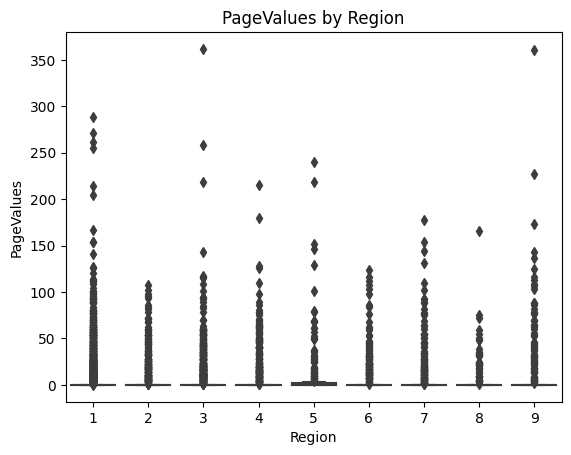

In [ ]:
sns.boxplot(x='Region', y='PageValues', data=dfs)
plt.title('PageValues by Region')
plt.xlabel('Region')
plt.ylabel('PageValues')

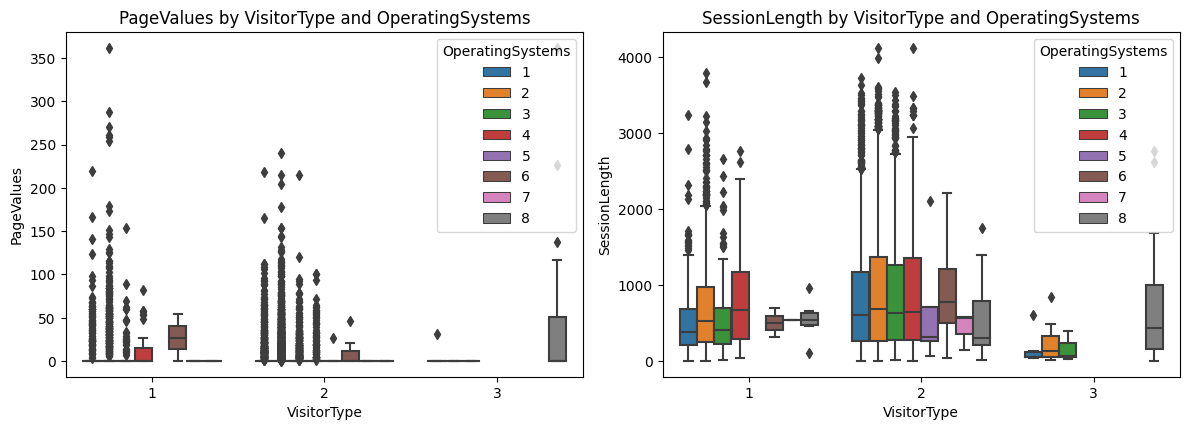

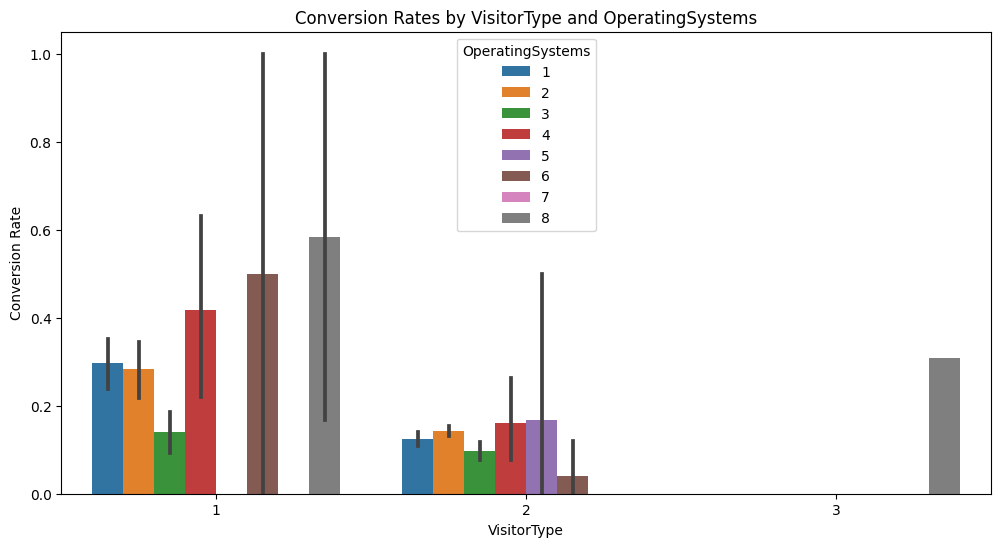

In [ ]:

# Calculate Session Lengths
dfs['SessionLength'] = dfs['Administrative_Duration'] + dfs['Informational_Duration'] + dfs['ProductRelated_Duration']

# Create Groups
grouped_df = dfs.groupby(['VisitorType', 'OperatingSystems', 'Region'])

# Analyze Behavior
behavior_metrics = ['PageValues', 'SessionLength']  # Add more as needed

# Visualize Behavior
plt.figure(figsize=(12, 8))
for metric in behavior_metrics:
    plt.subplot(2, 2, behavior_metrics.index(metric) + 1)
    sns.boxplot(x='VisitorType', y=metric, hue='OperatingSystems', data=dfs)
    plt.title(f'{metric} by VisitorType and OperatingSystems')
    plt.xlabel('VisitorType')
    plt.ylabel(metric)
    plt.legend(title='OperatingSystems')

plt.tight_layout()
plt.show()

# Calculate Conversion Rates
conversion_rates = grouped_df['Revenue'].mean().reset_index()

# Visualize Conversion Rates
plt.figure(figsize=(12, 6))
sns.barplot(x='VisitorType', y='Revenue', hue='OperatingSystems', data=conversion_rates)
plt.title('Conversion Rates by VisitorType and OperatingSystems')
plt.xlabel('VisitorType')
plt.ylabel('Conversion Rate')
plt.legend(title='OperatingSystems')
plt.show()


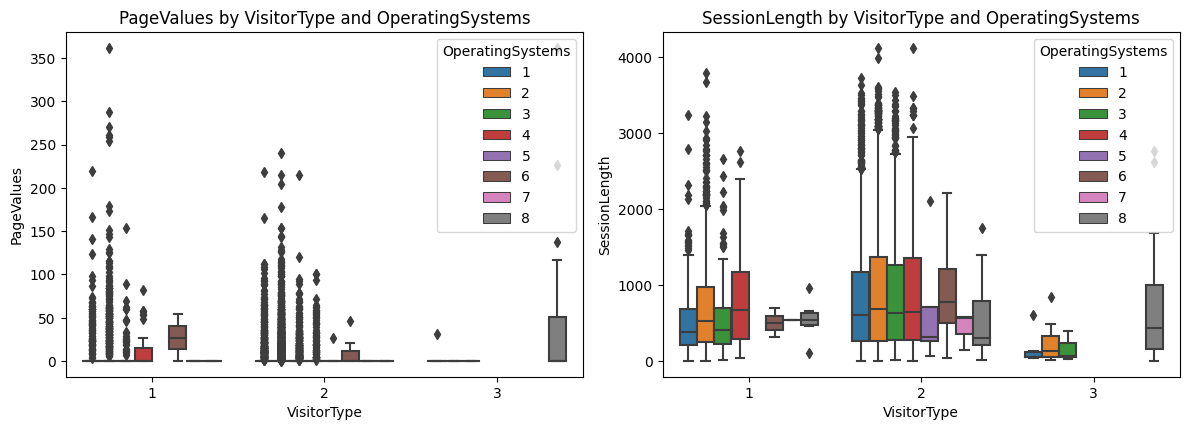

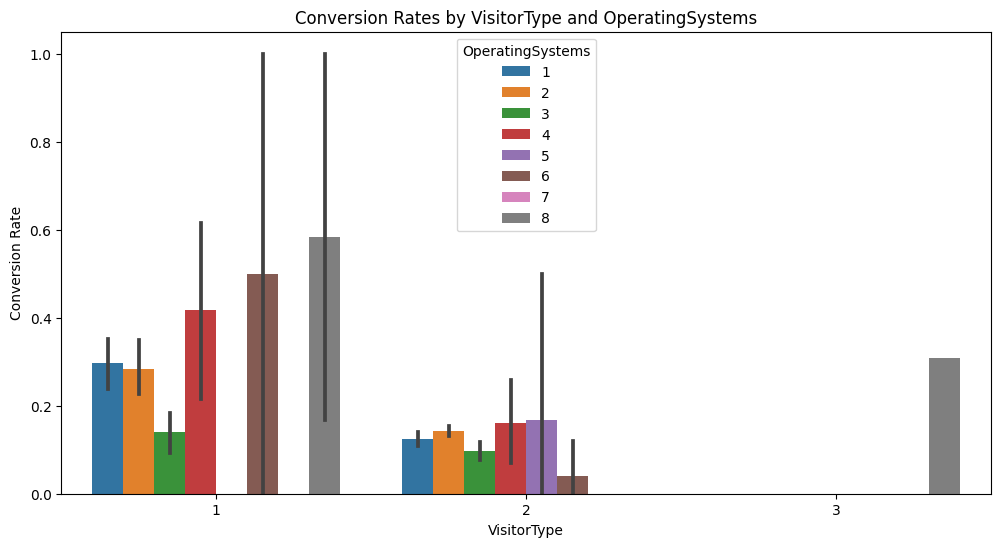

In [ ]:
# Create Groups
grouped_df = dfs.groupby(['VisitorType', 'OperatingSystems', 'Region'])

# Analyze Behavior
behavior_metrics = ['PageValues', 'SessionLength']

# Visualize Behavior
plt.figure(figsize=(12, 8))
for metric in behavior_metrics:
    plt.subplot(2, 2, behavior_metrics.index(metric) + 1)
    sns.boxplot(x='VisitorType', y=metric, hue='OperatingSystems', data=dfs)
    plt.title(f'{metric} by VisitorType and OperatingSystems')
    plt.xlabel('VisitorType')
    plt.ylabel(metric)
    plt.legend(title='OperatingSystems')

plt.tight_layout()
plt.show()

# Calculate Conversion Rates
conversion_rates = grouped_df['Revenue'].mean().reset_index()

# Visualize Conversion Rates
plt.figure(figsize=(12, 6))
sns.barplot(x='VisitorType', y='Revenue', hue='OperatingSystems', data=conversion_rates)
plt.title('Conversion Rates by VisitorType and OperatingSystems')
plt.xlabel('VisitorType')
plt.ylabel('Conversion Rate')
plt.legend(title='OperatingSystems')
plt.show()


In [ ]:

grouped_traffic = dfs.groupby('TrafficType').agg({
    'ProductRelated_Duration': 'mean',  # Adjust with your engagement metric
    'Revenue': 'mean',
    # Add other relevant metrics here
}).reset_index()

# Rename columns for clarity
grouped_traffic = grouped_traffic.rename(columns={
    'ProductRelated_Duration': 'AverageEngagementTime',
    'Revenue': 'PurchaseProbability'
})

print(grouped_traffic.head())


   TrafficType  AverageEngagementTime  PurchaseProbability
0            1             826.713377             0.104497
1            2             828.091124             0.202344
2            3             709.692945             0.090383
3            4             776.017503             0.165854
4            5             469.054963             0.235577


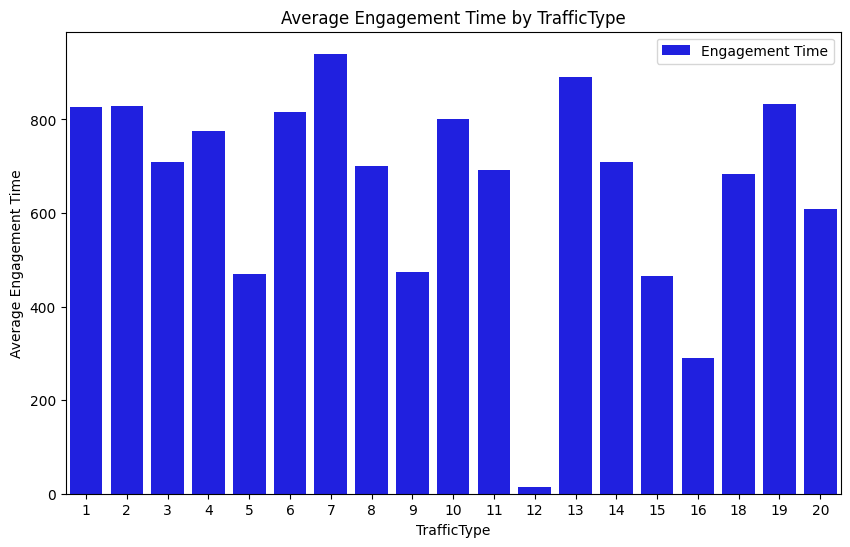

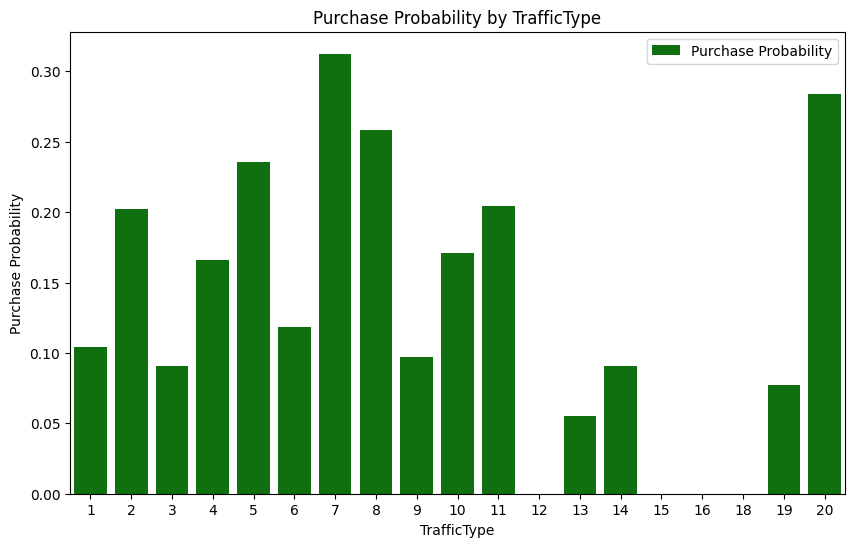

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='TrafficType', y='AverageEngagementTime', data=grouped_traffic, color='blue', label='Engagement Time')
plt.title('Average Engagement Time by TrafficType')
plt.xlabel('TrafficType')
plt.ylabel('Average Engagement Time')
plt.legend(loc='upper right')

plt.figure(figsize=(10, 6))
sns.barplot(x='TrafficType', y='PurchaseProbability', data=grouped_traffic, color='green', label='Purchase Probability')
plt.title('Purchase Probability by TrafficType')
plt.xlabel('TrafficType')
plt.ylabel('Purchase Probability')
plt.legend(loc='upper right')

plt.show()

1. Optimize Content for High-Engagement TrafficTypes:

For TrafficTypes 1, 2, 7, 13, and 19, where average engagement time is high, consider optimizing content, such as product recommendations, special offers, or interactive elements, to further enhance user engagement.
2. Targeted Marketing for High Purchase Probability:

Since TrafficType 7 has higher purchase probability, consider implementing targeted marketing campaigns for users coming from TrafficType 7. This could include personalized offers, incentives, or promotions to increase the likelihood of conversion.
3. User Experience Optimization:

Focus on improving the user experience for TrafficTypes with high engagement but lower purchase probability. Evaluate the user journey, checkout process, and potential friction points to enhance the conversion funnel.
4. Campaign Allocation:

Allocate marketing resources more effectively by prioritizing campaigns or advertisements for TrafficTypes with a higher likelihood of conversion. This can optimize your return on investment (ROI) in marketing efforts.

In [ ]:
dfc.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
1      1      1961.0  Graduation         Single  57091.0      0.0       0.0   
2  10476      1958.0  Graduation        Married  67267.0      0.0       1.0   
3   1386      1967.0  Graduation       Together  32474.0      1.0       1.0   
4   5371      1989.0  Graduation         Single  21474.0      1.0       0.0   
6   4073      1954.0    2n Cycle        Married  63564.0      0.0       0.0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
1  2014-06-15      0.0     464.0  ...                  3.0                7.0   
2  2014-05-13      0.0     134.0  ...                  2.0                5.0   
3  2014-05-11      0.0      10.0  ...                  0.0                2.0   
4  2014-04-08      0.0       6.0  ...                  1.0                2.0   
6  2014-01-29      0.0     769.0  ...                 10.0                7.0   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
1                5.0             0             0             0             0   
2                2.0             0             0             0             0   
3                7.0             0             0             0             0   
4                7.0             1             0             0             0   
6                6.0             1             0             0             0   

   AcceptedCmp2  Complain  Country  
1             1       0.0       CA  
2             0       0.0       US  
3             0       0.0      AUS  
4             0       0.0       SP  
6             0       0.0      GER  

[5 rows x 27 columns]

In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 1 to 2236
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1506 non-null   int64         
 1   Year_Birth           1506 non-null   float64       
 2   Education            1506 non-null   object        
 3   Marital_Status       1506 non-null   object        
 4   Income               1506 non-null   float64       
 5   Kidhome              1506 non-null   float64       
 6   Teenhome             1506 non-null   float64       
 7   Dt_Customer          1506 non-null   datetime64[ns]
 8   Recency              1506 non-null   float64       
 9   MntWines             1506 non-null   float64       
 10  MntFruits            1506 non-null   float64       
 11  MntMeatProducts      1506 non-null   float64       
 12  MntFishProducts      1506 non-null   float64       
 13  MntSweetProducts     1506 non-nul

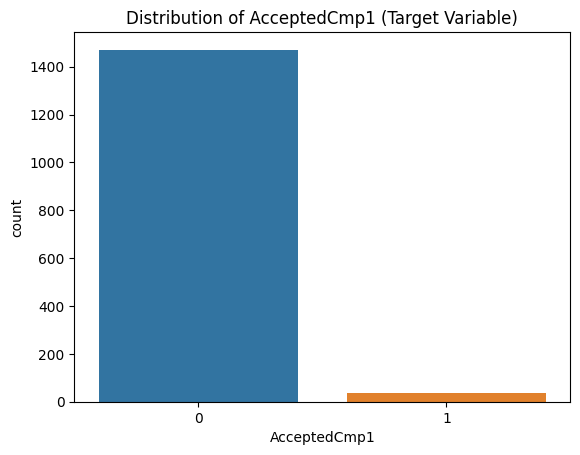

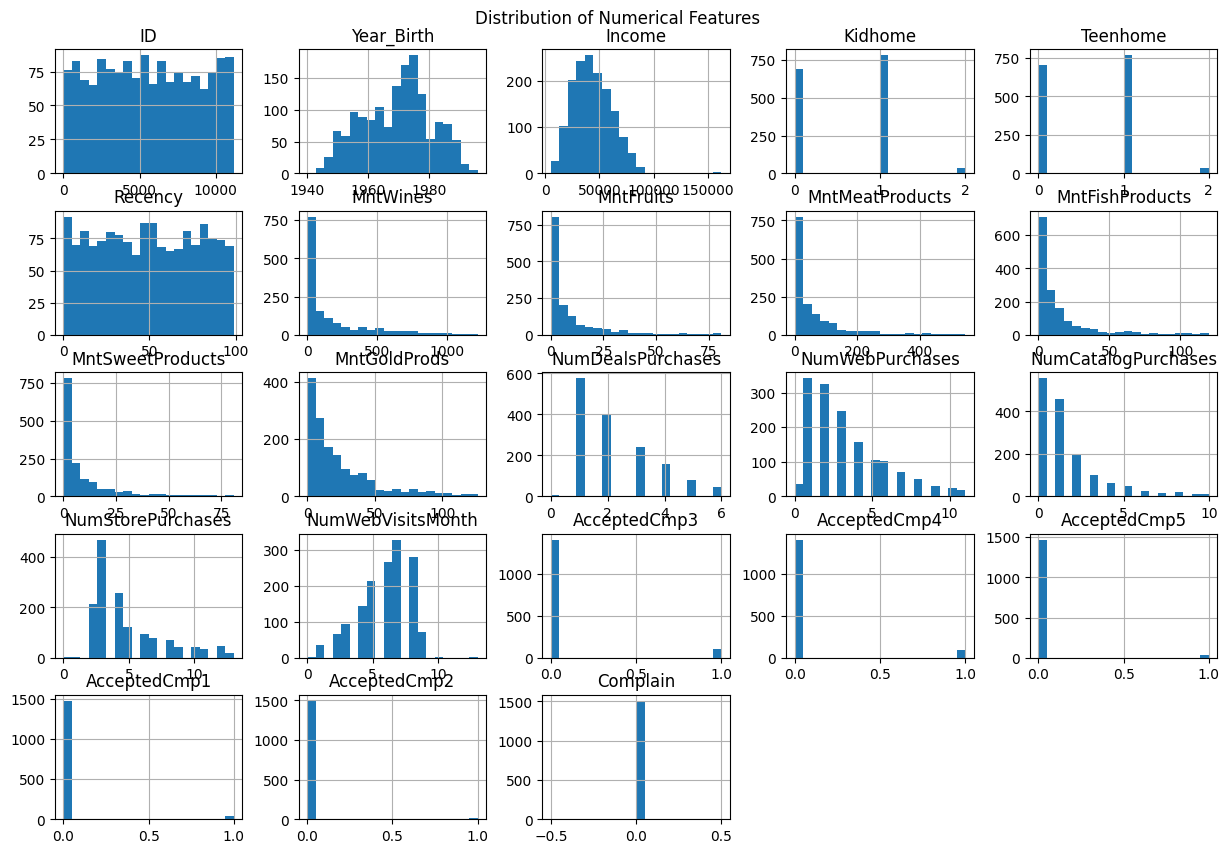

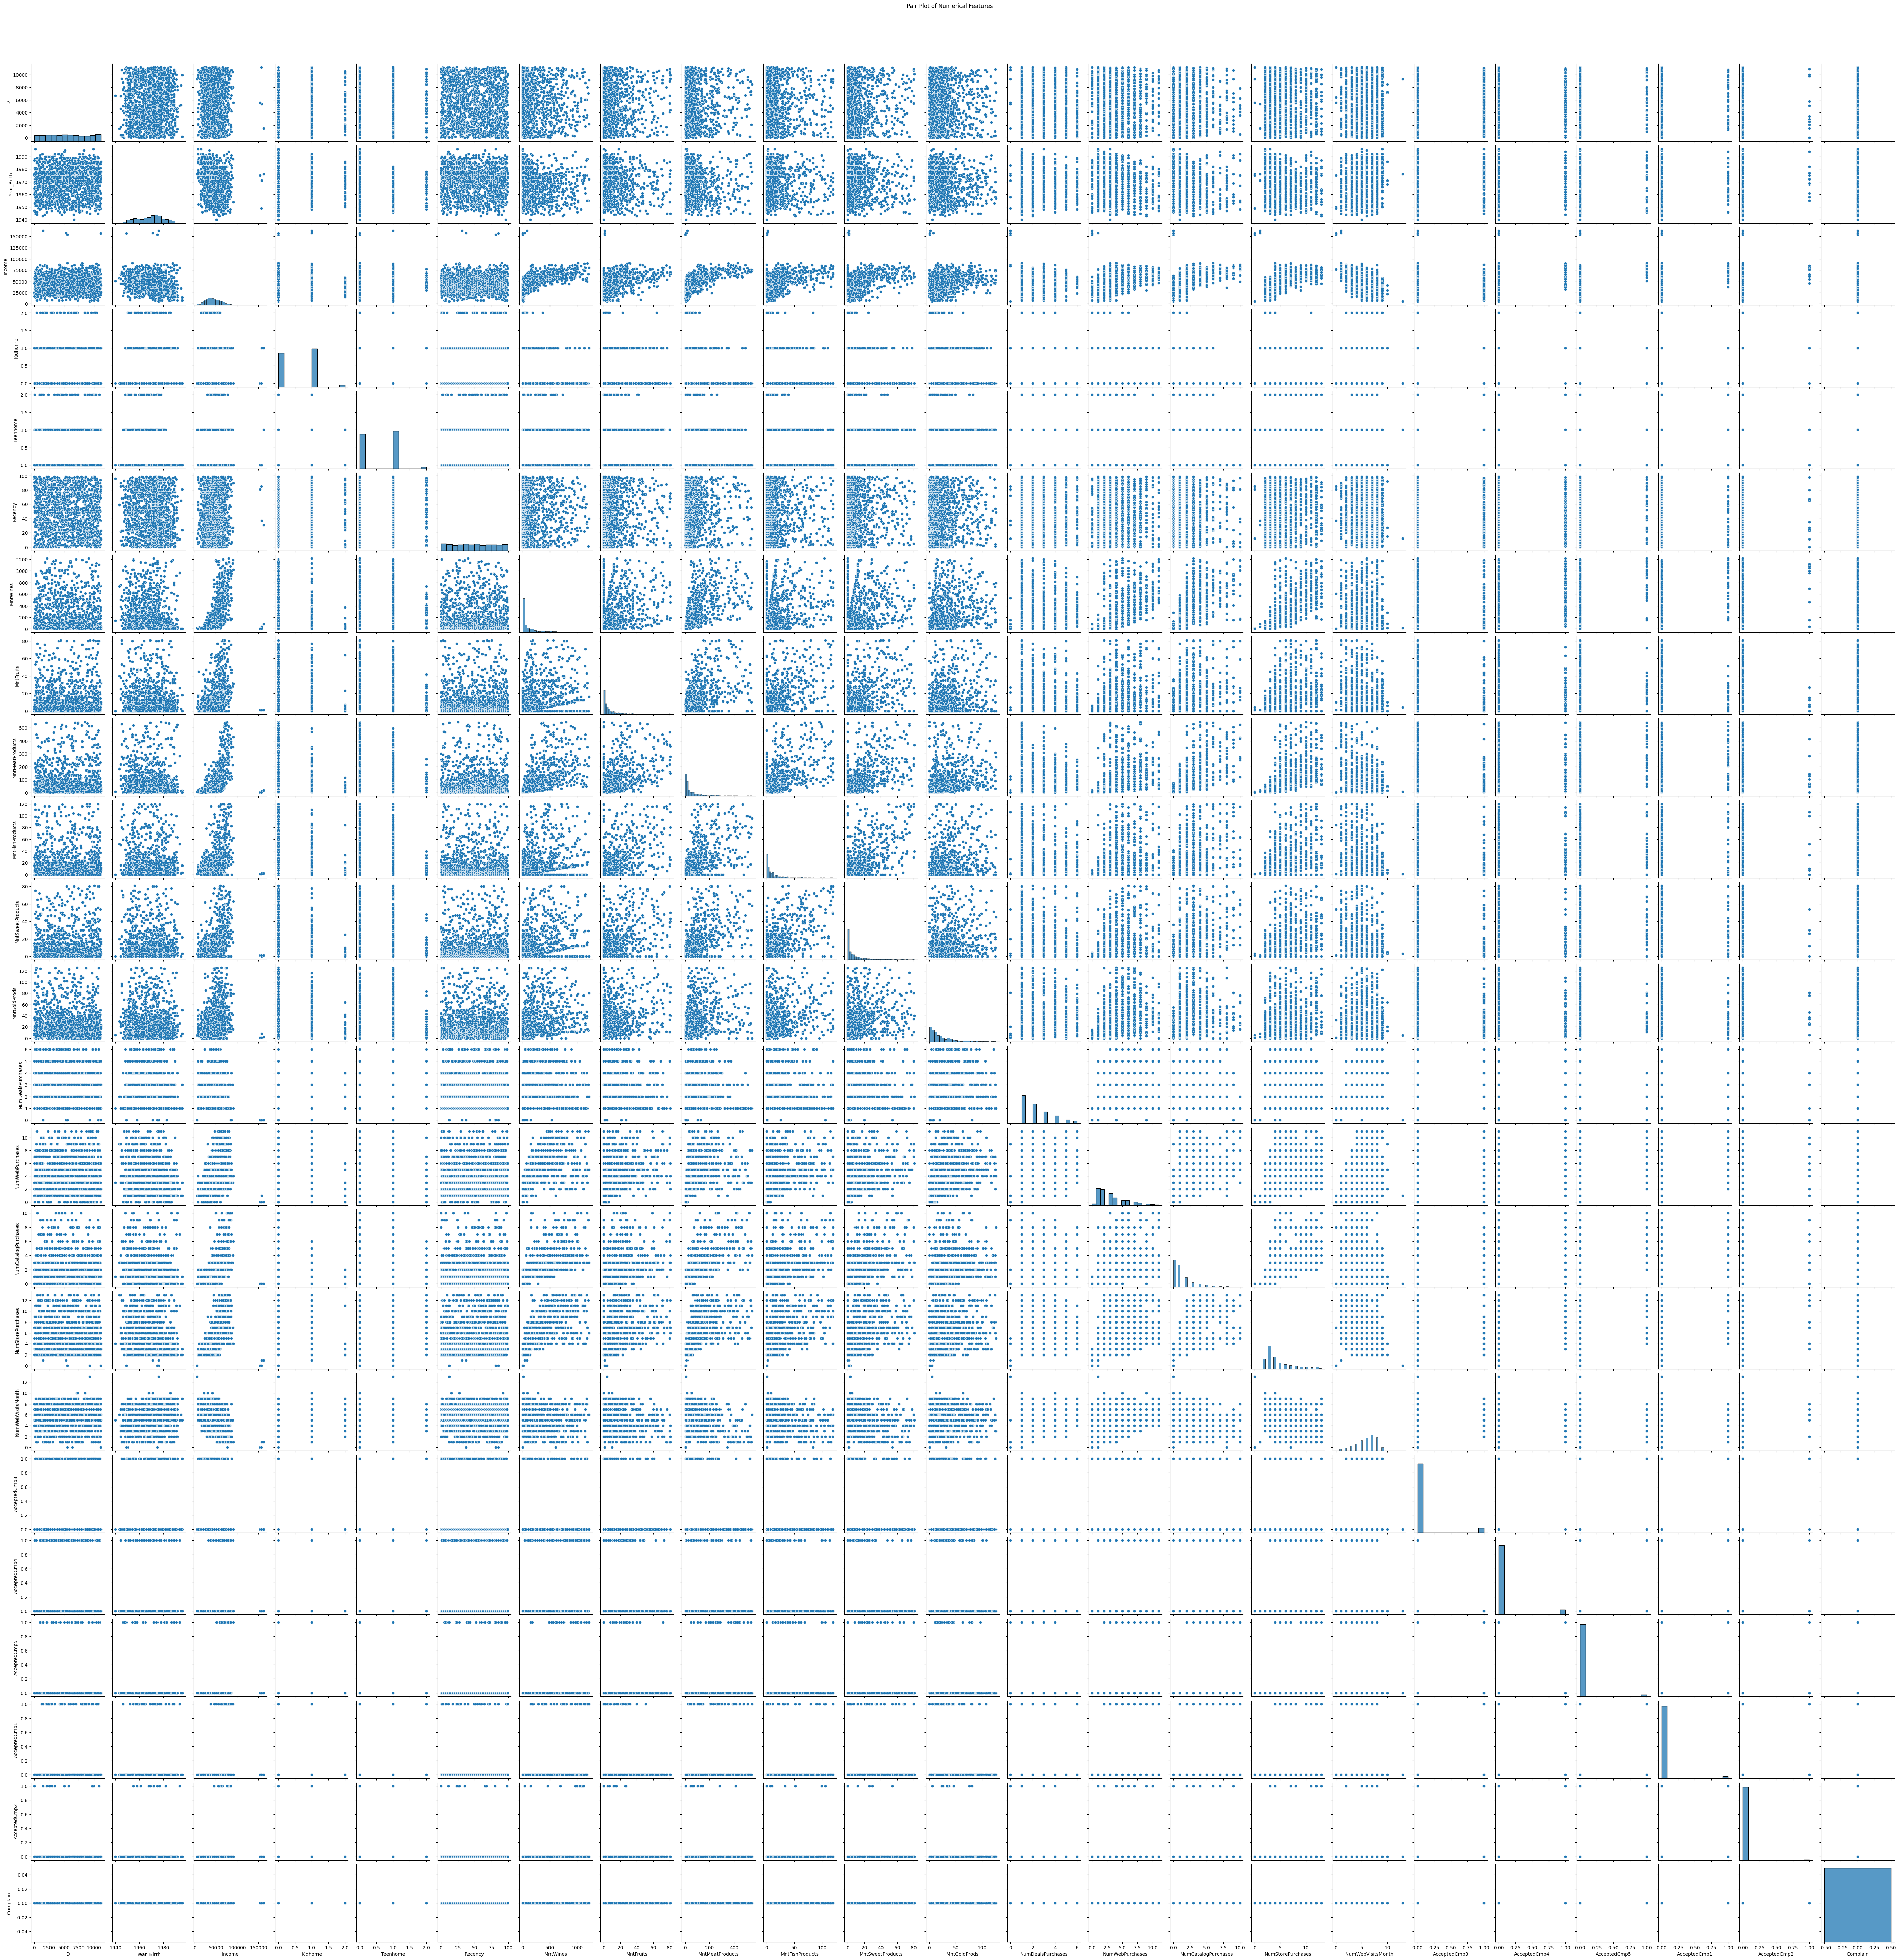

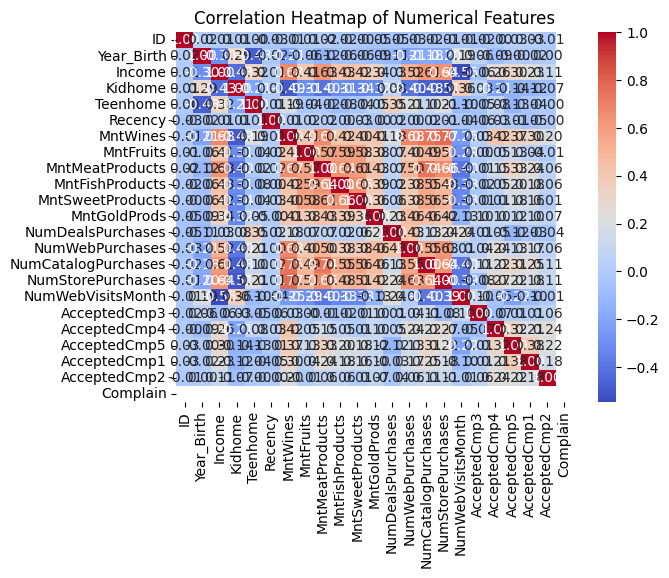

In [ ]:
sns.countplot(x='AcceptedCmp1', data=dfc)
plt.title('Distribution of AcceptedCmp1 (Target Variable)')
plt.show()

# Distribution of numerical features
numerical_features = dfc.select_dtypes(include=['int64', 'float64']).columns
dfc[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features', y=0.92)
plt.show()

# Pair plot for numerical features
sns.pairplot(dfc[numerical_features])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# Correlation heatmap
correlation_matrix = dfc[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Date-based Features:

In [ ]:
dfc['Enrollment_Year'] = dfc['Dt_Customer'].dt.year
dfc['Enrollment_Month'] = dfc['Dt_Customer'].dt.month
dfc['Enrollment_Day'] = dfc['Dt_Customer'].dt.day

Age Calculation:

In [ ]:
current_year = pd.to_datetime('today').year
dfc['Age'] = current_year - dfc['Year_Birth']

Income Transformation:

In [ ]:
# Log transformation of 'Income'
dfc['Income_Log'] = dfc['Income'].apply(lambda x: 0 if x == 0 else np.log(x))


Interaction Features:

In [ ]:
# Example: Interaction between 'MntWines' and 'MntMeatProducts'
dfc['Wine_Meat_Interaction'] = dfc['MntWines'] * dfc['MntMeatProducts']


Boolean to Binary:

In [ ]:
# Assuming 'Complain' is a binary variable
dfc['Complain_Binary'] = dfc['Complain'].map({'No': 0, 'Yes': 1})


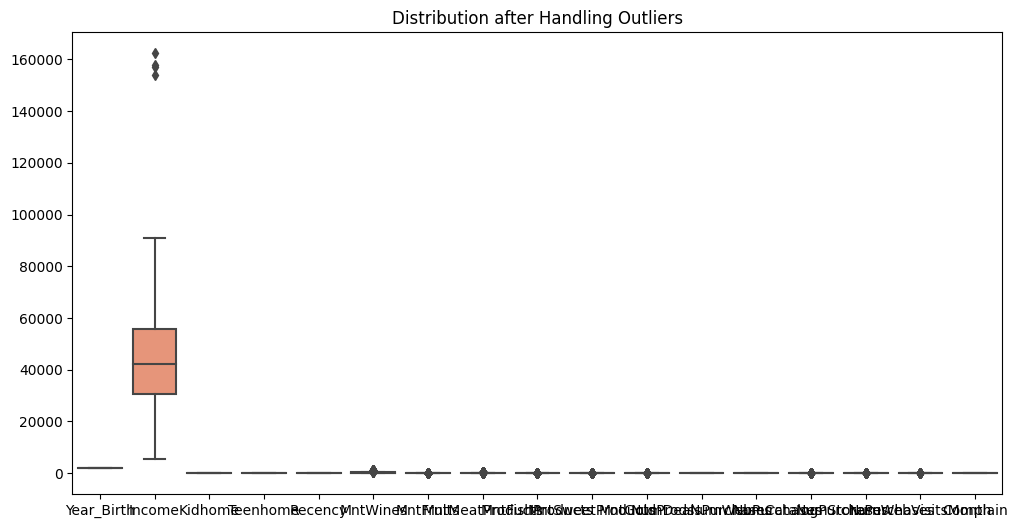

In [ ]:
for column in numerical_features_campaign:
    dfc = handle_outliers_iqr(dfc, column)

# Drop rows with outliers
dfc = dfc.dropna()

# Visualize the distribution after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=dfc[numerical_features_campaign])
plt.title('Distribution after Handling Outliers')
plt.show()

**chi-squared test** for independence is appropriate since both income and education are categorical variables.

The null hypothesis (H0) would be that there is no association between income and education,

The alternative hypothesis (H1) would be that there is a significant association.

In [ ]:
# Convert 'Income' to categorical variable if needed
# Create bins for income levels
income_bins = [0, 30000, 60000, 90000, np.inf]
income_labels = ['Low', 'Medium', 'High', 'Very High']
dfc['Income_Category'] = pd.cut(dfc['Income'], bins=income_bins, labels=income_labels)


In [ ]:
contingency_table = pd.crosstab(dfc['Income_Category'], dfc['Education'])
contingency_table

Education        2n Cycle  Basic  Graduation  Master  PhD
Income_Category                                          
Low                    50     51         184      40   28
Medium                 68      1         405     170  227
High                   12      0         117      52   95
Very High               0      0           1       2    3

In [ ]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=251.06562156413574, pvalue=8.201684200141227e-47, dof=12, expected_freq=array([[3.04714475e+01, 1.21885790e+01, 1.65717795e+02, 6.18804781e+01,
        8.27416999e+01],
       [7.51859230e+01, 3.00743692e+01, 4.08895750e+02, 1.52685259e+02,
        2.04158699e+02],
       [2.38247012e+01, 9.52988048e+00, 1.29569721e+02, 4.83824701e+01,
        6.46932271e+01],
       [5.17928287e-01, 2.07171315e-01, 2.81673307e+00, 1.05179283e+00,
        1.40637450e+00]]))

In this case, the p-value is extremely small (close to zero), indicating strong evidence against the null hypothesis.

Therefore, we can reject the null hypothesis and conclude that there is a significant association between the income category and education level of customers.

In [ ]:
# Assuming spending columns exist in the campaign_data DataFrame
# Create a new variable representing total spending
dfc['Total_Spending'] = dfc[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


In [ ]:
data_for_test = dfc[['Income', 'Total_Spending']].dropna()

# Perform Pearson correlation test
corr_coef, p_value = pearsonr(data_for_test['Income'], data_for_test['Total_Spending'])

print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.7159322280308112
P-value: 5.963681823781945e-237


The positive correlation coefficient suggests that there is a strong positive linear relationship between income and total spending across all categories. In other words, as income increases, total spending tends to increase as well.

Given the low p-value, you can reject the null hypothesis and conclude that there is a statistically significant positive correlation between income and total spending. This implies that higher-income individuals are more likely to spend more across various product categories.

In [ ]:
# Assuming 'Marital_Status' and 'MntWines' columns exist in the campaign_data DataFrame
# Group individuals into "Couples" and "Alone"
dfc['Group'] = dfc['Marital_Status'].replace({'Married': 'Couples', 'Together': 'Couples',
                                                                  'Divorced': 'Alone', 'Single': 'Alone',
                                                                  'Absurd': 'Alone', 'Widow': 'Alone', 'YOLO': 'Alone'})


In [ ]:
wine_couples = dfc[dfc['Group'] == 'Couples']['MntWines']
wine_alone = dfc[dfc['Group'] == 'Alone']['MntWines']

# Perform independent t-test
t_statistic, p_value = ttest_ind(wine_couples, wine_alone, equal_var=False)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -0.02227409447336662
P-value: 0.9822335281311514


The p-value is greater than the commonly used significance level of 0.05. Therefore, you fail to reject the null hypothesis.

it appears that the mean wine spending between couples and individuals living alone is not significantly different in your dataset.


Are people with lower income are more attracted towards campaign or simply put accept more campaigns ?

In [ ]:
# Calculate the median income
median_income = dfc['Income'].median()

# Create a new column for income bracket
dfc['Income_Bracket'] = np.where(dfc['Income'] <= median_income, 'Below Median', 'Above Median')

# Create a binary column for campaign acceptance
dfc['Any_Campaign_Accepted'] = dfc[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].any(axis=1)


In [ ]:
contingency_table = pd.crosstab(dfc['Income_Bracket'], dfc['Any_Campaign_Accepted'])

# Perform chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-square statistic: 33.44054124381993
P-value: 7.347625206037936e-09


The small p-value indicates that there is a significant association between income bracket and campaign acceptance. Therefore, you can reject the null hypothesis and conclude that people with different income brackets have significantly different campaign acceptance rates.

Therefore people with different income brackets in dataset exhibit different behaviors regarding campaign acceptance.

Investigate if recency (number of days since the last purchase) influences campaign acceptance.

In [ ]:
# Assuming 'Recency' and 'AcceptedCampaign' columns exist in the campaign_data DataFrame

# Create a binary column for campaign acceptance
dfc['AcceptedCampaign'] = dfc[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].any(axis=1)

# Split the data into two groups based on campaign acceptance
accepted_group = dfc[dfc['AcceptedCampaign']]
not_accepted_group = dfc[~dfc['AcceptedCampaign']]


In [ ]:
t_stat, p_value = ttest_ind(accepted_group['Recency'], not_accepted_group['Recency'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -1.0871289539394466
P-value: 0.27715401499156733


In this case, the p-value is higher than the typical significance level of 0.05, suggesting that there is not enough evidence to reject the null hypothesis.

The result suggests that there is no statistically significant difference in recency values between customers who accepted the campaign and those who did not.

Test if the number of web purchases (NumWebPurchases) is associated with campaign acceptance.

In [ ]:
contingency_table = pd.crosstab(dfc['NumWebPurchases'], dfc['AcceptedCampaign'])

# Display the contingency table
print(contingency_table)

AcceptedCampaign  False  True 
NumWebPurchases               
0.0                  36      1
1.0                 306     36
2.0                 301     25
3.0                 220     26
4.0                 131     25
5.0                  84     21
6.0                  78     23
7.0                  48     23
8.0                  36     15
9.0                  22      8
10.0                  8     15
11.0                 11      7


In [ ]:
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-square statistic: 116.54565678153303
P-value: 8.962441363991104e-20


extremely low p-value indicates that there is a statistically significant association between the number of web purchases and campaign acceptance.

we reject the null hypothesis, and we conclude that there is a significant association between the number of web purchases and the likelihood of accepting the campaign.
This implies that the number of web purchases is not independent of campaign acceptance.

**Insights :**
1. User Engagement Patterns:

Users who accepted the campaign tend to have higher engagement, as indicated by the number of web purchases. This suggests that engaged users are more likely to respond positively to campaigns.
2. Income and Spending:

There is a strong positive correlation (0.72) between income and spending across various product categories. Higher-income customers tend to spend more.
3. Education and Income:

The education level of customers is significantly associated with their income. This relationship is supported by a chi-square test.
4. Effect of Marital Status on Wine Spending:

Marital status does not seem to have a significant impact on wine spending. The t-statistic and p-value indicate that couples and individuals living alone spend similarly on wine.
5. Campaign Acceptance and Income:

Lower-income individuals are not more attracted to campaigns compared to higher-income individuals. This is suggested by the chi-square test results.
6. Effect of Recency on Campaign Acceptance:

The number of days since the last purchase (recency) does not appear to have a significant influence on campaign acceptance. This is supported by the t-statistic and p-value from the hypothesis test.
7. Special Day Impact on Revenue:

There is a weak negative correlation (-0.066) between SpecialDay and Revenue. This suggests that the proximity to special days may have a slight negative impact on revenue.
8. Visitor Type and Operating System Behavior:

Different visitor types exhibit varied behavior based on the operating system they use. Understanding these patterns can help tailor marketing strategies.
9. Web Traffic Analysis:

Certain TrafficType values, such as 1, 2, 7, 13, and 19, show higher average engagement time and a higher probability of purchase. This information is valuable for optimizing marketing channels.
10. Association between Page Categories and Revenue:

Analyzing page views and durations for different page categories in relation to revenue can provide insights into areas for optimization and improving the user experience.

**Recommendations :**

1. Personalized Campaigns:

Tailor marketing campaigns to target users with a history of higher web purchases. Personalized campaigns are more likely to resonate with engaged users.
2. Segmented Marketing:

Segment marketing efforts based on income brackets and education levels. Differentiated strategies can be more effective in reaching and engaging specific customer segments.
3. Enhanced User Experience:

Focus on improving the user experience for different visitor types based on their preferred operating systems. A seamless experience can positively impact engagement.
4. Strategic Special Day Promotions:

Plan special promotions around significant days, taking into account the observed slight negative correlation with revenue. Strategic promotions can mitigate potential negative effects.
5. Optimize Web Traffic Channels:

Concentrate efforts on web traffic channels such as 1, 2, 7, 13, and 19, which show higher engagement and purchase probability. Allocate resources efficiently to these channels.
6. Diversify Product Offerings:

Explore diversifying product offerings to align with the preferences of different customer segments. Understanding spending patterns can guide product expansion.
7. Improve Education-Targeted Campaigns:

If education level significantly influences income, consider crafting targeted campaigns for specific education segments. Highlight offerings that appeal to different educational backgrounds.
8. Monitor and Reward Customer Loyalty:

Keep track of customer recency but focus more on overall engagement. Implement loyalty programs or incentives to reward consistent users and encourage repeat purchases.
9. Evaluate Bounce/Exit Rates:

Investigate and optimize pages with higher bounce/exit rates to enhance the user journey. A seamless and engaging online experience can positively impact conversion rates.
10. Comprehensive Data Collection:

Continue collecting and analyzing data to adapt strategies over time. Regularly revisit user behavior patterns and adjust marketing approaches based on evolving trends.